### Student Information
Name:謝欣妤

Student ID:110034007

GitHub ID:hsinyu1226

Kaggle name:xinnHs

Kaggle private scoreboard snapshot: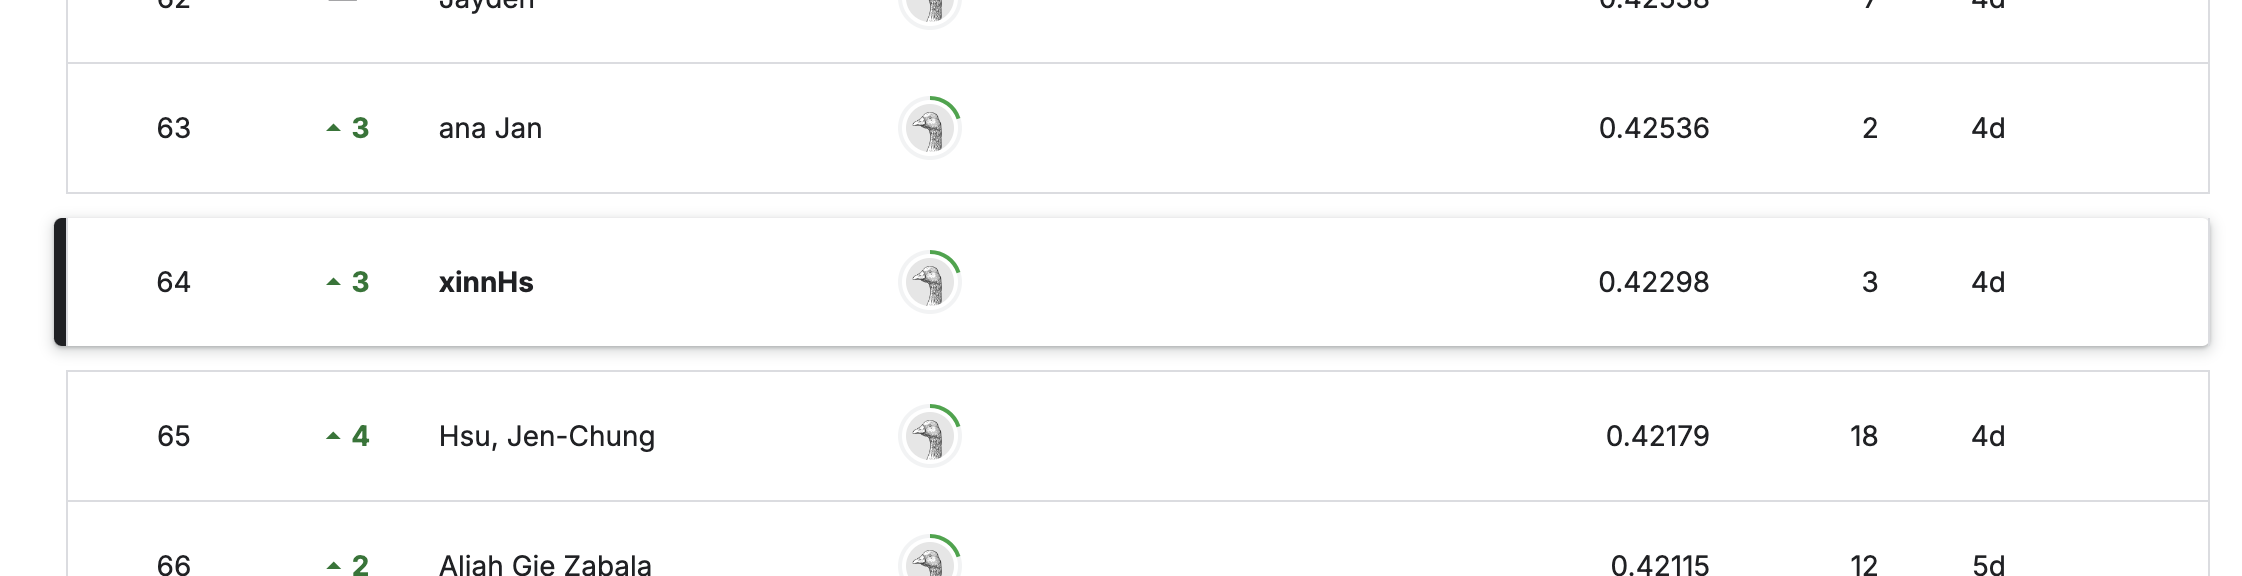

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

#Prepare the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import json
import os

In [ ]:
tweets = []
with open('/content/drive/MyDrive/DMLab2/tweets_DM.json', 'r') as file:
    for line in file:
        json_data = json.loads(line)
        tweets.append(json_data['_source']['tweet'])

tweets = pd.json_normalize(tweets)

In [ ]:
tweets

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [ ]:
emotion = pd.read_csv('/content/drive/MyDrive/DMLab2/emotion.csv')
data_identification = pd.read_csv('/content/drive/MyDrive/DMLab2/data_identification.csv')

In [ ]:
df_train = tweets.merge(emotion, on='tweet_id', how='outer')
df_train = df_train.merge(data_identification, on='tweet_id', how='outer')
df_train

,hashtags,tweet_id,text,emotion,identification
0,[],0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",NaN,test
1,[BlackMirror],0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,joy,train
2,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation,train
3,[],0x1c7f12,I tried to figure out why you mean so much to ...,NaN,test
4,"[auspol, fizza]",0x1c7f13,"The only “big plan” you ever had in your life,...",NaN,test
...,...,...,...,...,...
1867530,"[WesHoolahan, WALvIRL, COYBIG]",0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,anticipation,train
1867531,"[not, maga]",0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,surprise,train
1867532,[],0x38fe1b,I told myself I'd be twitter famous. twitter m...,NaN,test
1867533,[],0x38fe1c,..today was brutal ..#Hungover,disgust,train


In [ ]:
test = df_train[df_train['identification'] == 'test']
train = df_train[df_train['identification'] == 'train']

In [ ]:
train = train[['tweet_id','text','emotion']]
test = test[['tweet_id','text','emotion']]

In [ ]:
train

,tweet_id,text,emotion
1,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,joy
2,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation
5,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,joy
6,0x1c7f15,I'm one of those people who love candy corn......,joy
7,0x1c7f16,@metmuseum What are these? They look like some...,disgust
...,...,...,...
1867529,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,sadness
1867530,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,anticipation
1867531,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,surprise
1867533,0x38fe1c,..today was brutal ..#Hungover,disgust


In [ ]:
test

,tweet_id,text,emotion
0,0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",NaN
3,0x1c7f12,I tried to figure out why you mean so much to ...,NaN
4,0x1c7f13,"The only “big plan” you ever had in your life,...",NaN
8,0x1c7f17,"Looking back on situations old & new, recent o...",NaN
9,0x1c7f18,@jasoninthehouse Why do you insist on talking ...,NaN
...,...,...,...
1867509,0x38fe04,"""The Grand Bargain"" The Great American Betraya...",NaN
1867511,0x38fe06,I get to be a 1 year old girl's new mama start...,NaN
1867524,0x38fe13,Asian dude with dangly gold earrings is back &...,NaN
1867525,0x38fe14,I think @kostakoufos might be the worst player...,NaN


#Pre-processing

In [ ]:
train.isnull().sum()

,0
tweet_id,0
text,0
emotion,0


In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train['cleaned_text'] = train['text'].apply(clean_text)

In [ ]:
test['cleaned_text'] = test['text'].apply(clean_text)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
train['cleaned_text'] = train['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test['cleaned_text'] = test['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['emotion_label'] = le.fit_transform(train['emotion'])

In [ ]:
train

,tweet_id,text,emotion,cleaned_text,emotion_label
1,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,joy,g shut dance though blackmirror lh,4
2,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation,twitch lh destinybeta destiny destiny2 destiny...,1
5,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,joy,nice sunny wak morning many lh aroud whites ti...,4
6,0x1c7f15,I'm one of those people who love candy corn......,joy,im one people love candy corn lot confession l...,4
7,0x1c7f16,@metmuseum What are these? They look like some...,disgust,look like something toddlers make summer camp ...,2
...,...,...,...,...,...
1867529,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,sadness,um vote lh song summer lh,5
1867530,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,anticipation,weshoolahan walvirl coybig lh,1
1867531,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,surprise,fake news lh propagated tumpkins lh maga,6
1867533,0x38fe1c,..today was brutal ..#Hungover,disgust,today brutal hungover,2


In [ ]:
from sklearn.model_selection import train_test_split

X = train['cleaned_text']
y = train['emotion_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model training

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, SpatialDropout1D, BatchNormalization

max_len = 300
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

max_words = len(tokenizer.word_index) + 1  # including OOV token

# build the model

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.3),

    Conv1D(128, 5, activation='relu'),
    BatchNormalization(),

    Bidirectional(LSTM(100, return_sequences=True)),
    GlobalMaxPooling1D(),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(8, activation='softmax')
])


model.build(input_shape=(None, max_len))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 300, 128)            │      63,791,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ (None, 300, 128)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 296, 128)            │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 296, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 296, 200)            │         183,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 200)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,070,248 (244.41 MB)

 Trainable params: 64,069,992 (244.41 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [ ]:
from keras.utils import to_categorical
y_train_2 = to_categorical(y_train)
y_test_2 = to_categorical(y_test)
y_train_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

rlrp = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
earlystopping = EarlyStopping(monitor='val_accuracy', mode='auto', patience=4, restore_best_weights=True)

In [ ]:
hist = model.fit(
    X_train_pad,
    y_train_2,
    epochs=3,
    batch_size=64,
    validation_data=(X_test_pad, y_test_2),
    callbacks=[rlrp, earlystopping]
)

Epoch 1/3
18195/18195 ━━━━━━━━━━━━━━━━━━━━ 1351s 74ms/step - accuracy: 0.4712 - loss: 1.4607 - val_accuracy: 0.5414 - val_loss: 1.2626 - learning_rate: 0.0010
Epoch 2/3
18195/18195 ━━━━━━━━━━━━━━━━━━━━ 1402s 74ms/step - accuracy: 0.5712 - loss: 1.2039 - val_accuracy: 0.5487 - val_loss: 1.2666 - learning_rate: 0.0010
Epoch 3/3
18195/18195 ━━━━━━━━━━━━━━━━━━━━ 1399s 74ms/step - accuracy: 0.6332 - loss: 1.0477 - val_accuracy: 0.5416 - val_loss: 1.3214 - learning_rate: 0.0010


In [ ]:
y_pred = np.argmax(model.predict(X_test_pad), axis=1)
print(classification_report(y_test, y_pred))

9098/9098 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step
              precision    recall  f1-score   support

           0       0.76      0.17      0.28      8062
           1       0.60      0.58      0.59     50129
           2       0.46      0.35      0.40     27789
           3       0.72      0.34      0.46     12679
           4       0.53      0.83      0.65    102986
           5       0.50      0.41      0.45     38793
           6       0.86      0.18      0.30      9790
           7       0.63      0.29      0.39     40885

    accuracy                           0.55    291113
   macro avg       0.63      0.39      0.44    291113
weighted avg       0.57      0.55      0.52    291113



#Prediction

In [ ]:
y_submit_seq = tokenizer.texts_to_sequences(test['cleaned_text'])
y_submit_pad = pad_sequences(y_submit_seq, maxlen=max_len, padding='post')

y_submit = np.argmax(model.predict(y_submit_pad), axis=1)
test['label'] = y_submit
test['emotion'] = le.inverse_transform(test['label'])
test['id'] = test['tweet_id']
test = test[['id','emotion']]
test

12875/12875 ━━━━━━━━━━━━━━━━━━━━ 120s 9ms/step


,id,emotion
0,0x1c7f0f,sadness
3,0x1c7f12,sadness
4,0x1c7f13,sadness
8,0x1c7f17,anticipation
9,0x1c7f18,disgust
...,...,...
1867509,0x38fe04,sadness
1867511,0x38fe06,joy
1867524,0x38fe13,joy
1867525,0x38fe14,sadness


In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/DMLab2/sampleSubmission.csv')
submission = sample_submission.drop(columns=['emotion']).merge(test, on='id', how='left')
submission

,id,emotion
0,0x2c7743,joy
1,0x2c1eed,joy
2,0x2826ea,joy
3,0x356d9a,joy
4,0x20fd95,joy
...,...,...
411967,0x351857,sadness
411968,0x2c028e,sadness
411969,0x1f2430,joy
411970,0x2be24e,anticipation


In [ ]:
submission.to_csv('output2.csv',index=False)